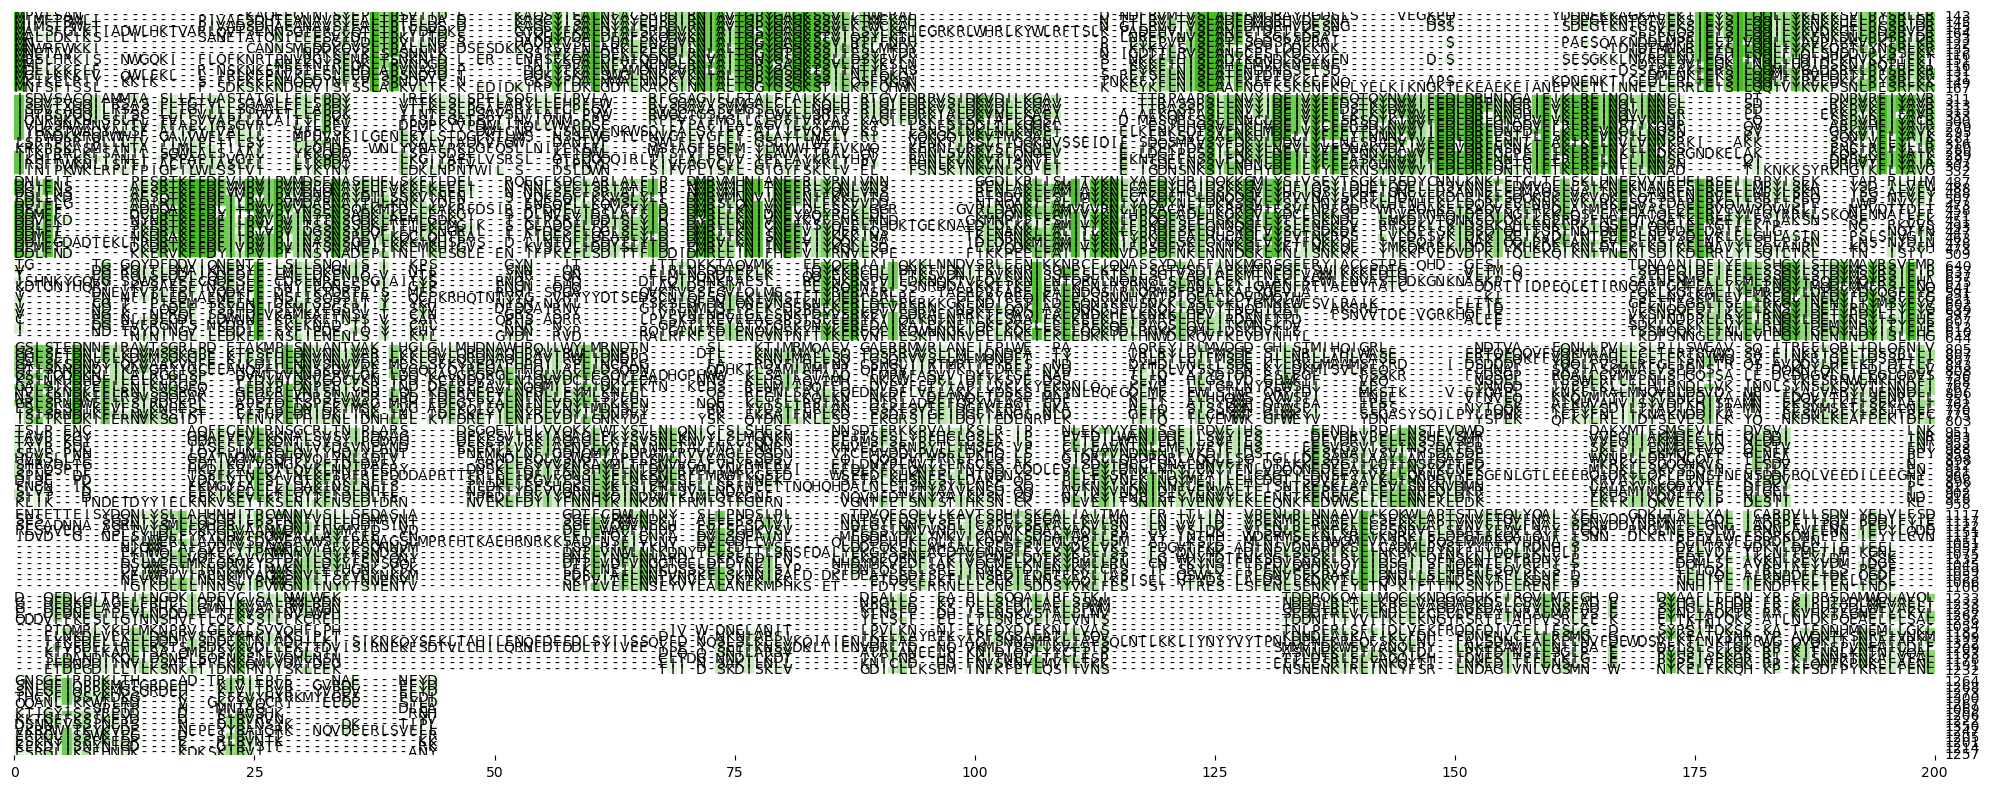

In [2]:
import biotite.sequence as seq
import biotite.sequence.io.fasta as fasta
import biotite.sequence.graphics as seqgraphics
import matplotlib.pyplot as plt

#Read in the sequence alignment
fasta_file = fasta.FastaFile.read("./tmn_structures/20260130_muscle3d_all_cluster_representatives/tmn_representatives_14.muscle3d_1chain.faa")
alignment = fasta.get_alignment(fasta_file)
#print(alignment)
fig = plt.figure(figsize=(20.0, 8.0))
ax = fig.add_subplot(111)
seqgraphics.plot_alignment_similarity_based(
    axes=ax,
    alignment=alignment,
    show_numbers = True,
    symbols_per_line=200,
    show_line_position=True)
fig.tight_layout()

In [9]:
#It seems that the only thing that I need is to get the secondary structures and then I can use this as 2dSS input
import biotite.application.dssp as dssp
import biotite.structure.io.pdb as pdb
import biotite.structure as struc
import numpy as np

#In order to use it further I need to substitute some advansed dssp elements with loops:
dssp_to_2dSS = {
    "I": "C",
    "S": "C",
    "H": "H",
    "E": "E",
    "G": "C",
    "B": "E",
    "T": "C",
    "C": "C",
}

folder = "./tmn_structures/20260130_muscle3d_all_cluster_representatives/pdbs/"
#get list of pdbs
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(folder) if isfile(join(folder, f))]
print(onlyfiles)
with open("./tmn_structures/20260130_muscle3d_all_cluster_representatives/tmn_representatives_2D_dssp.dat", 'w') as ouf:
    for file in onlyfiles:
        PDB = folder+file
        name = ""
        if file.startswith("WP"):
            name = file.split(".")[0]
        else:
            name = file.split("_")[0]
        pdb_file = pdb.PDBFile.read(PDB)
        array = pdb.get_structure(pdb_file, model=1)
        #print(struc.get_chains(array))
        onlyaa = array[struc.filter_amino_acids(array)]
        chains = np.unique(onlyaa.chain_id)
        if "B" in chains:
            monomer = onlyaa[onlyaa.chain_id == "B"]
        elif "A" in chains:
            monomer = onlyaa[onlyaa.chain_id == "A"]
        sse = dssp.DsspApp.annotate_sse(monomer, bin_path="/usr/local/apps/DSSP/2.3.0/bin/mkdssp")
        #convert to more obvious set of elements
        sse = np.array([dssp_to_2dSS[e] for e in sse], dtype="U1")
        sselist = sse.tolist()
        #print(sselist)
        ssestring = ''.join(sselist)
        #print((str(ssestring)+"\n"))
        ouf.write(name+"\t")
        ouf.write(ssestring+"\n")


['Tmn-1359_dimer_AF2.pdb', 'WP_195608912.1.pdb', 'WP_137041639.1.pdb', 'WP_001238334.1.pdb', 'WP_074392124.1.pdb', 'WP_207736177.1.pdb', 'WP_156195838.1.pdb', 'WP_080459486.1.pdb', 'Tmn-70_dimer_AF2.pdb', 'Tmn-48_dimer_AF2.pdb', 'Tmn-11_dimer_AF2.pdb', 'WP_160542721.1.pdb', 'WP_144401145.1.pdb', 'Tmn-25_dimer_AF2.pdb']
